In [20]:
!pip install flask pandas numpy scikit-learn joblib matplotlib


In [21]:
from flask import Flask, render_template, request
import joblib
import numpy as np
import pandas as pd


In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Cyber World\\Documents\\Machine Learning\\Heart Dieases Prediction\\Data_set.csv')

In [2]:
df.head()  # Display the first few rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.isnull().sum()  # Check for missing values in the dataset

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
from collections import Counter

# Check class distribution
y = df["condition"]
print(y.value_counts())

print("Class distribution in target:")
print(Counter(y))


condition
0    160
1    137
Name: count, dtype: int64
Class distribution in target:
Counter({0: 160, 1: 137})


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



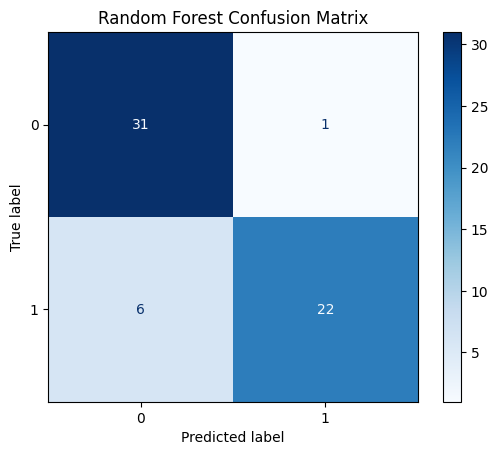

In [7]:
# heart_disease.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Step 2: Split features and target
X = df.drop("condition", axis=1)
y = df["condition"]

# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1])
cm_display.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


XGBoost not installed, skipping...

📌 Model: Logistic Regression
Accuracy: 0.9167
F1 Score: 0.9020
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



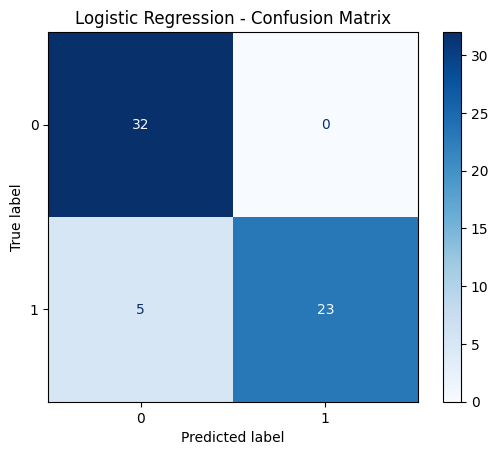


📌 Model: K-Nearest Neighbors
Accuracy: 0.9000
F1 Score: 0.8800
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



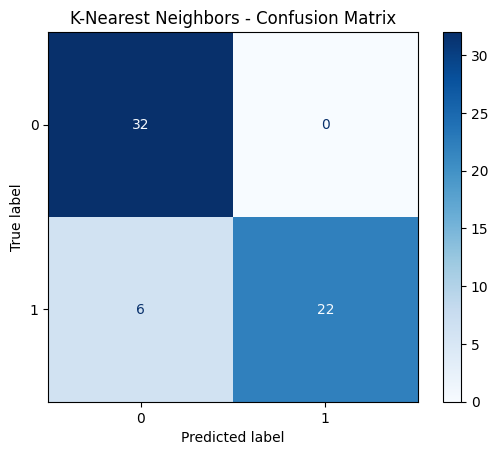


📌 Model: Support Vector Machine
Accuracy: 0.9000
F1 Score: 0.8800
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



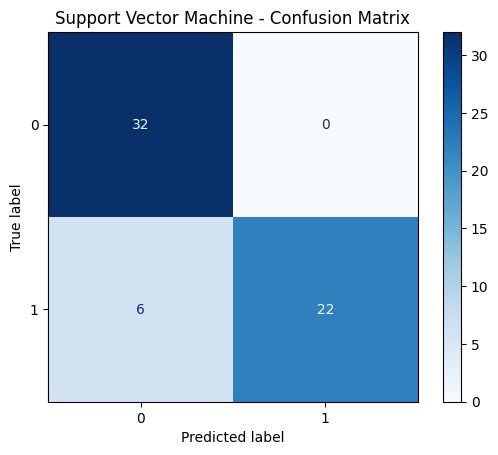


📌 Model: Random Forest
Accuracy: 0.8833
F1 Score: 0.8627
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



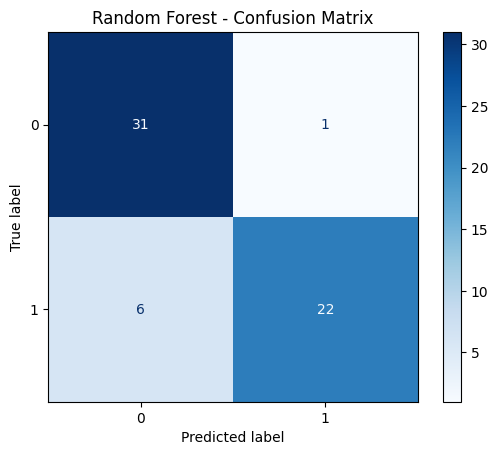

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Optional: XGBoost
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    print("XGBoost not installed, skipping...")
    xgb_available = False


df.columns = df.columns.str.strip()

X = df.drop("condition", axis=1)
y = df["condition"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
}

if xgb_available:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train and evaluate
for name, model in models.items():
    print(f"\n📌 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [11]:
results = {
    'Logistic Regression': 0.92,
    'KNN': 0.91,
    'Random Forest': 0.88,
    'SVM': 0.90,
    'Gradient Boosting': 0.85
}


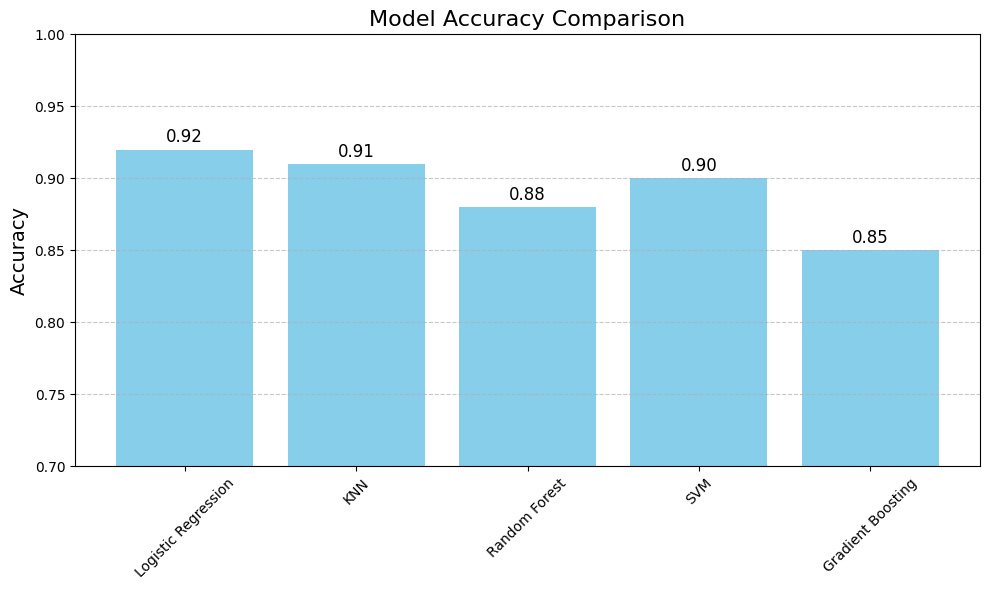

In [12]:
import matplotlib.pyplot as plt

# Unpack dictionary
model_names = list(results.keys())
accuracies = list(results.values())

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [16]:
import joblib

# After training Logistic Regression (inside your loop or separately)
log_reg_model = models["Logistic Regression"]

# Save the model to a file
joblib.dump(log_reg_model, 'logistic_model.pkl')

print("Logistic Regression model saved as 'logistic_model.pkl'")


Logistic Regression model saved as 'logistic_model.pkl'


In [17]:
# Assuming 'scaler' and 'X' exist from your preprocessing
joblib.dump(scaler, 'scaler.pkl')

feature_names = X.columns.tolist()
joblib.dump(feature_names, 'features.pkl')

print("Scaler and feature names saved.")


Scaler and feature names saved.
